In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.cluster import KMeans

# Set up warning handling
import warnings
warnings.filterwarnings("ignore")

In [17]:
# Load the customer data from the CSV file
customer_data = pd.read_csv("Mall_Customers.csv")

In [18]:
# Explore the data
def explore_data(dataframe):
    # Display basic information about the DataFrame
    print("DataFrame Information:")
    print(dataframe.info())
    
     # Display column names
    print("\nColumn Names:")
    print(dataframe.columns)
    
     # Display the first few rows of the DataFrame
    print("\nFirst Few Rows:")
    print(dataframe.head())

In [19]:
# Drop the "CustomerID" column
customer_data.drop("CustomerID", axis=1, inplace=True)

In [20]:
# Explore the data
explore_data(customer_data)

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None

Column Names:
Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

First Few Rows:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


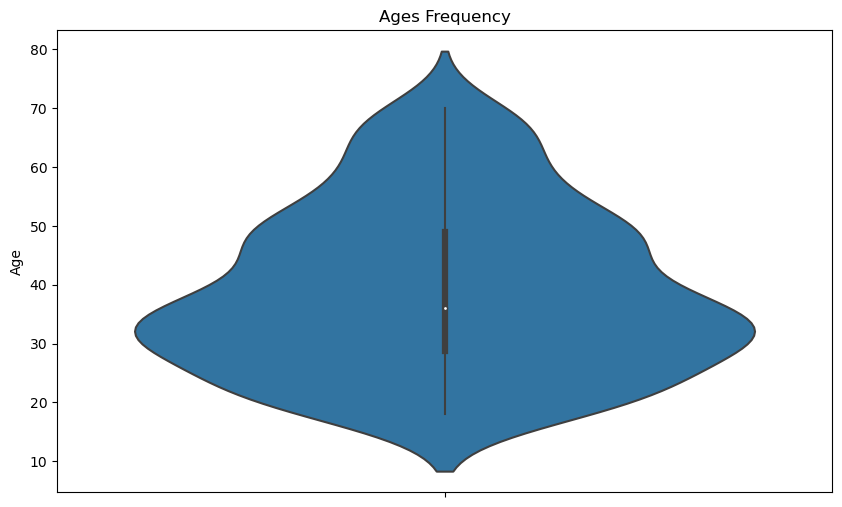

In [21]:
# Data Visualization

# Plot 1: Ages Frequency
plt.figure(figsize=(10, 6))
plt.title("Ages Frequency")
sns.violinplot(y=customer_data["Age"])
plt.show()

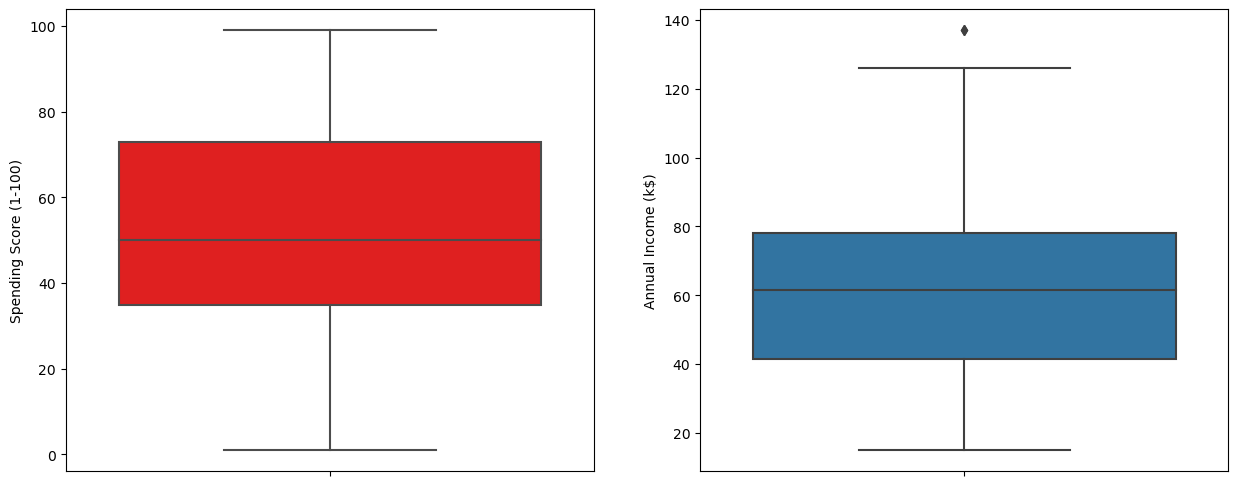

In [22]:
# Plot 2: Spending Score and Annual Income Box Plots
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=customer_data["Spending Score (1-100)"], color="red")
plt.subplot(1, 2, 2)
sns.boxplot(y=customer_data["Annual Income (k$)"])
plt.show()

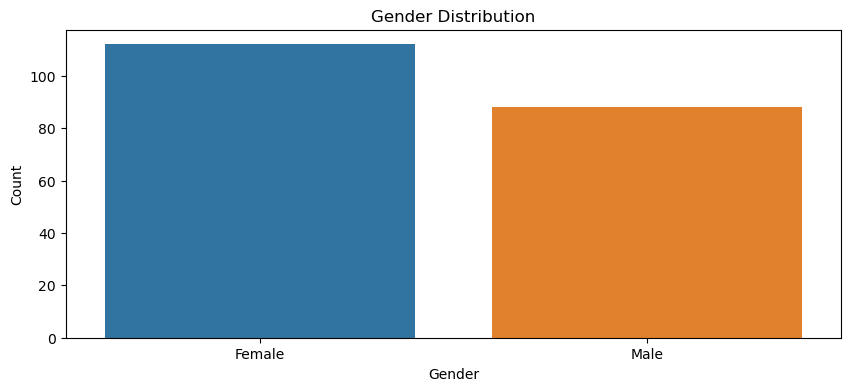

In [23]:
# Plot 3: Gender Distribution
gender_counts = customer_data["Gender"].value_counts()
plt.figure(figsize=(10, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

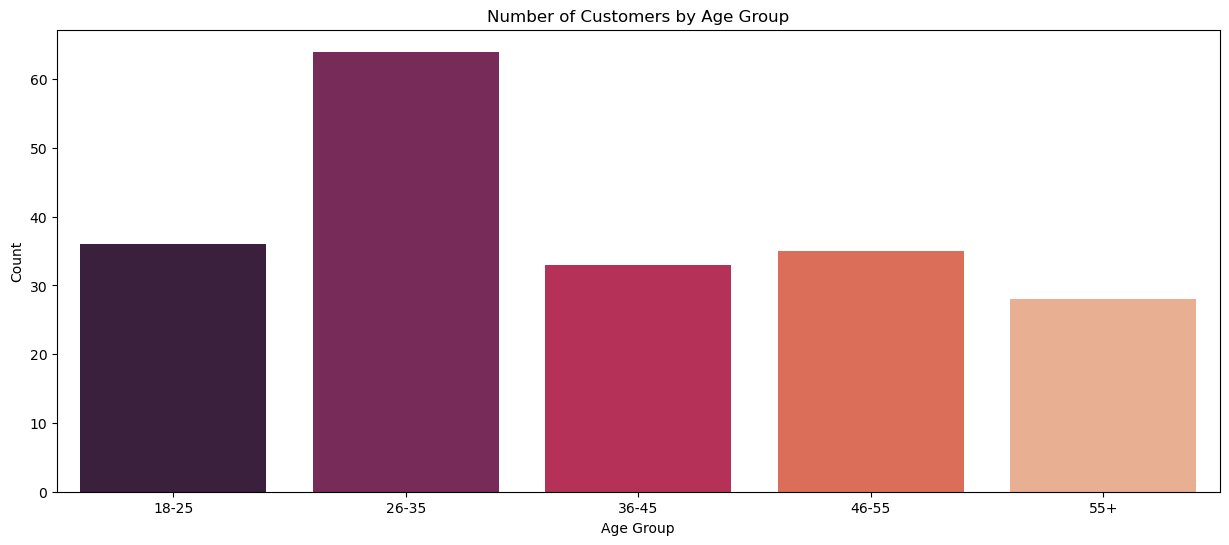

In [24]:
# Plot 4: Age Groups
age_bins = [18, 26, 36, 46, 56, customer_data["Age"].max()]
age_labels = ["18-25", "26-35", "36-45", "46-55", "55+"]
customer_data["Age Group"] = pd.cut(customer_data["Age"], bins=age_bins, labels=age_labels)
age_group_counts = customer_data["Age Group"].value_counts()
plt.figure(figsize=(15, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="rocket")
plt.title("Number of Customers by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

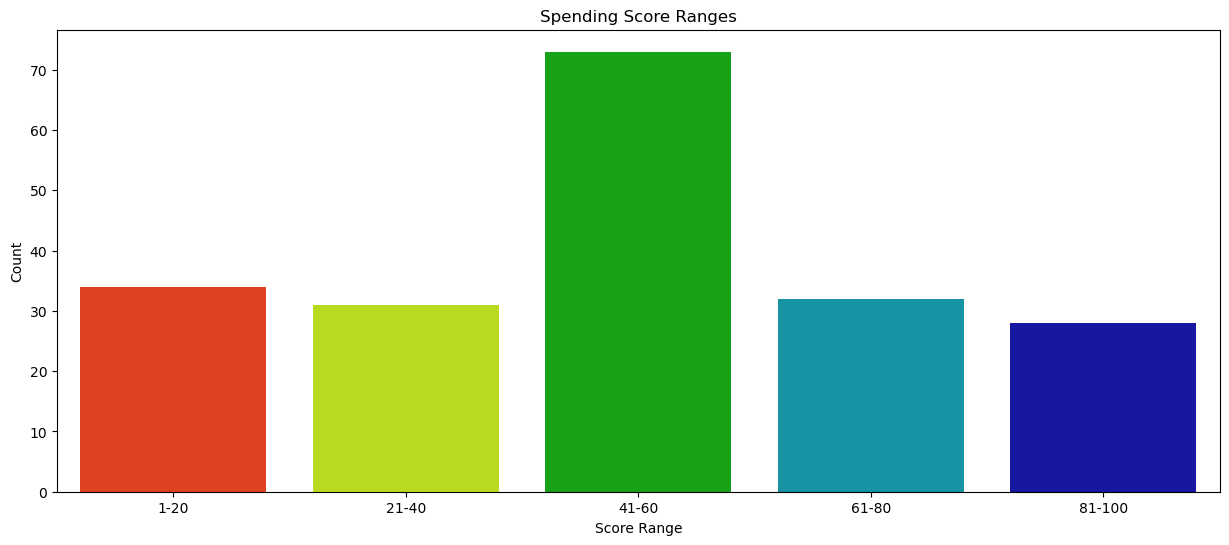

In [25]:
# Plot 5: Spending Score Ranges
spending_score_bins = [1, 21, 41, 61, 81, 101]
spending_score_labels = ["1-20", "21-40", "41-60", "61-80", "81-100"]
customer_data["Spending Score Range"] = pd.cut(customer_data["Spending Score (1-100)"], bins=spending_score_bins, labels=spending_score_labels)
spending_score_counts = customer_data["Spending Score Range"].value_counts()
plt.figure(figsize=(15, 6))
sns.barplot(x=spending_score_counts.index, y=spending_score_counts.values, palette="nipy_spectral_r")
plt.title("Spending Score Ranges")
plt.xlabel("Score Range")
plt.ylabel("Count")
plt.show()

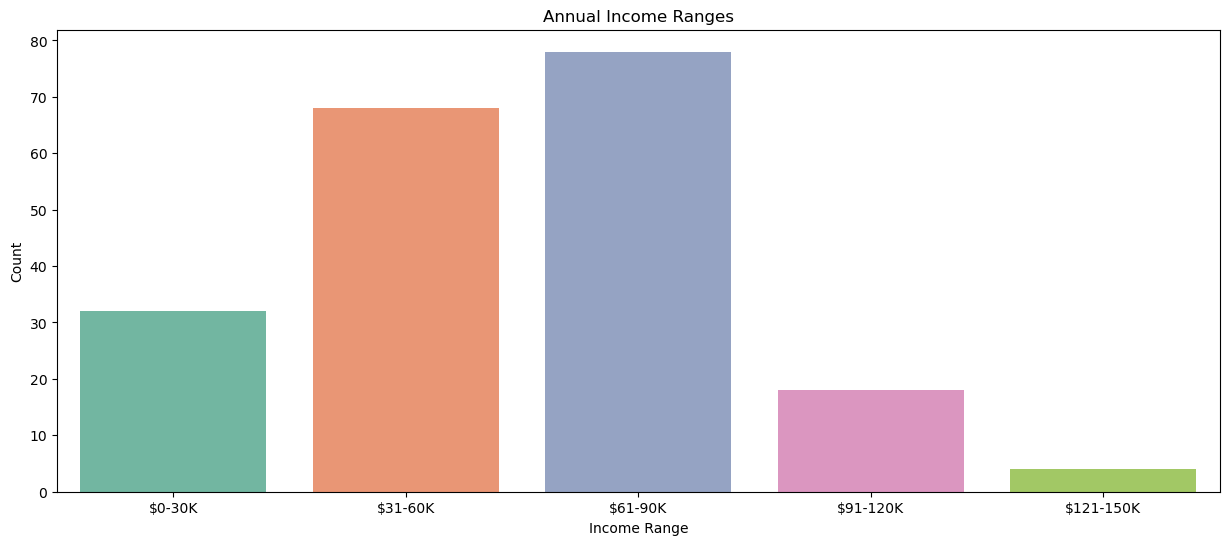

In [26]:
# Plot 6: Annual Income Ranges
income_bins = [0, 31, 61, 91, 121, 151]
income_labels = ["$0-30K", "$31-60K", "$61-90K", "$91-120K", "$121-150K"]
customer_data["Annual Income Range"] = pd.cut(customer_data["Annual Income (k$)"], bins=income_bins, labels=income_labels)
income_counts = customer_data["Annual Income Range"].value_counts()
plt.figure(figsize=(15, 6))
sns.barplot(x=income_counts.index, y=income_counts.values, palette="Set2")
plt.title("Annual Income Ranges")
plt.xlabel("Income Range")
plt.ylabel("Count")
plt.show()

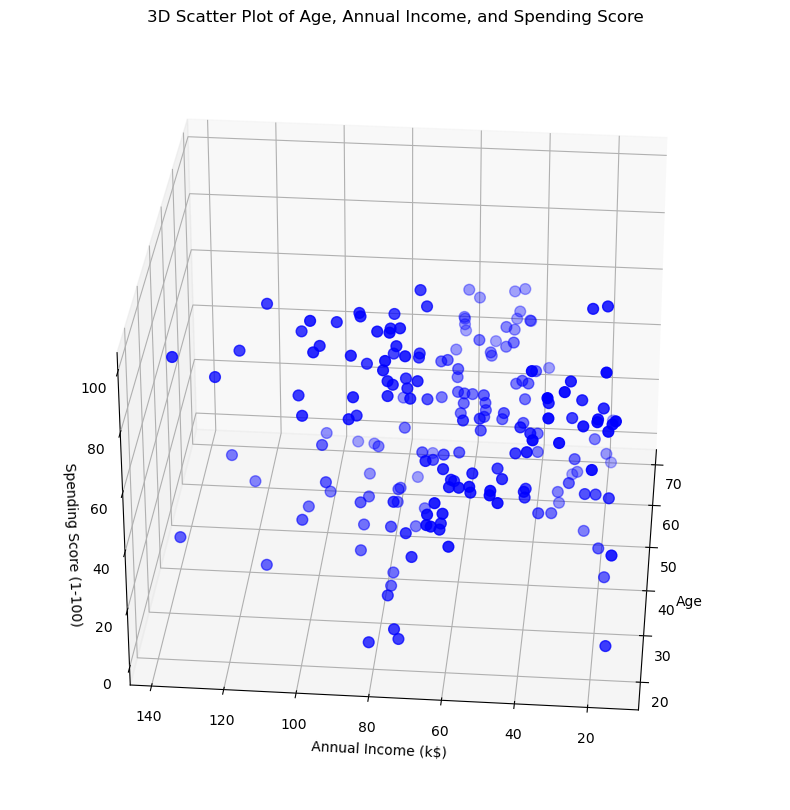

In [27]:
# Plot 7: 3D Scatter Plot of Age, Annual Income, and Spending Score
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer_data["Age"], customer_data["Annual Income (k$)"], customer_data["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title("3D Scatter Plot of Age, Annual Income, and Spending Score")
plt.show()

In [28]:
# K-Means Clustering
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(customer_data.iloc[:, 1:-3])  # Exclude non-numeric columns
    wcss.append(kmeans.inertia_)

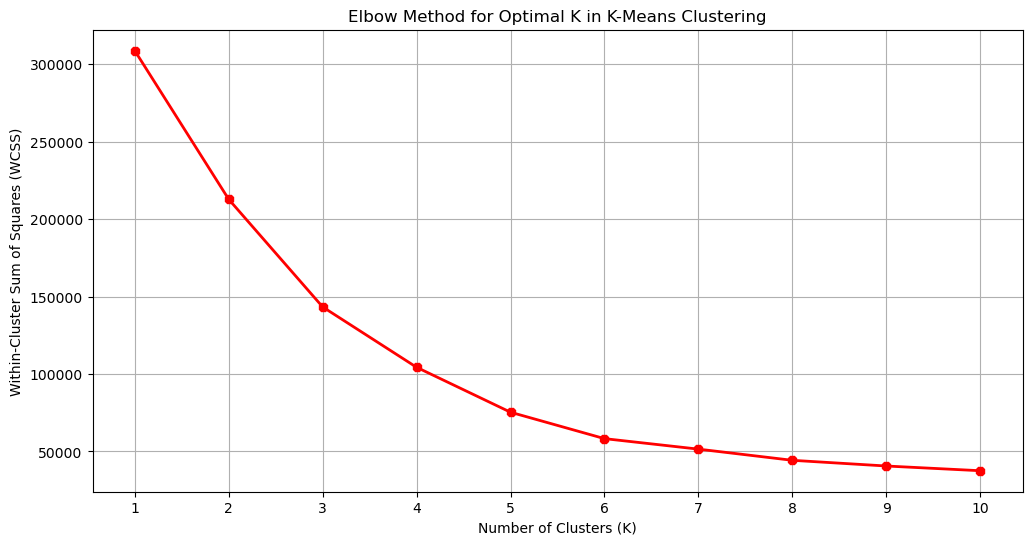

In [29]:
# Plot 8: Elbow Method to Determine Optimal K
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("Number of Clusters (K)")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K in K-Means Clustering")
plt.show()

In [30]:
# Perform K-Means Clustering with K=5
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(customer_data.iloc[:, 1:-3])  # Exclude non-numeric columns
customer_data["Cluster Label"] = clusters

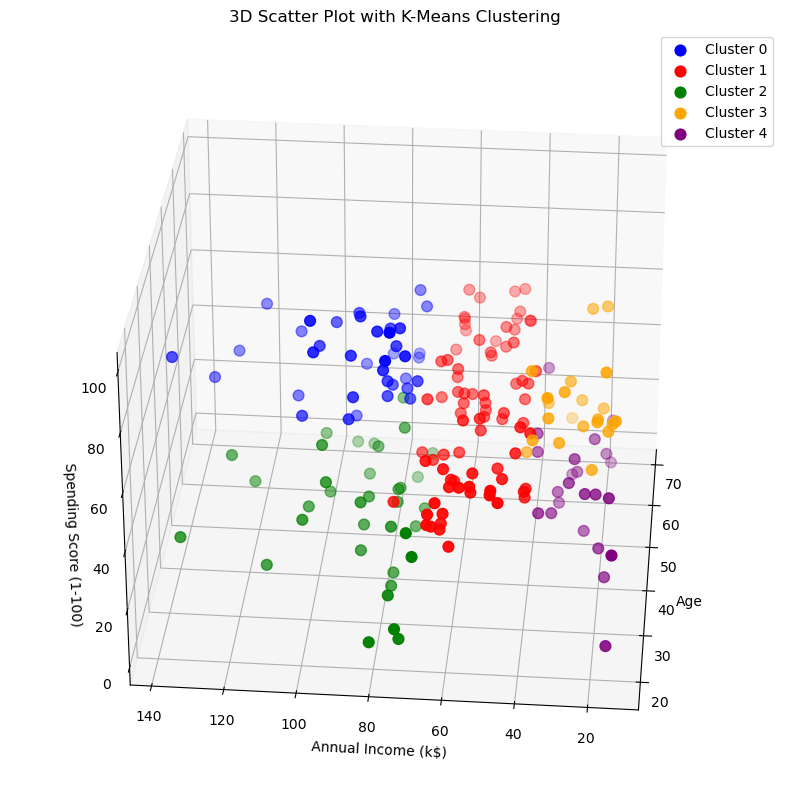

In [31]:
# Plot 9: 3D Scatter Plot with Cluster Labels
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
colors = ['blue', 'red', 'green', 'orange', 'purple']
for cluster_num, color in enumerate(colors):
    cluster_data = customer_data[customer_data["Cluster Label"] == cluster_num]
    ax.scatter(cluster_data["Age"], cluster_data["Annual Income (k$)"], cluster_data["Spending Score (1-100)"], c=color, s=60, label=f'Cluster {cluster_num}')
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title("3D Scatter Plot with K-Means Clustering")
plt.legend()
plt.show()